In [1]:
from sklearn.datasets import load_iris
from sklearn import tree
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target
X_train_1, X_test_1, Y_train_1, Y_test_1 = train_test_split(X, y, test_size = 0.2, random_state=5)

In [3]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [4]:
clf = LogisticRegression()
clf.fit(X_train_1,Y_train_1)

LogisticRegression()

In [5]:
clf.predict(X_test_1)- Y_test_1

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [6]:
clf.score(X_test_1, Y_test_1)

0.9666666666666667

In [7]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=4,min_samples_leaf=4)
clf.fit(X_train_1,Y_train_1)

DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=4)

In [8]:
X.shape

(150, 4)

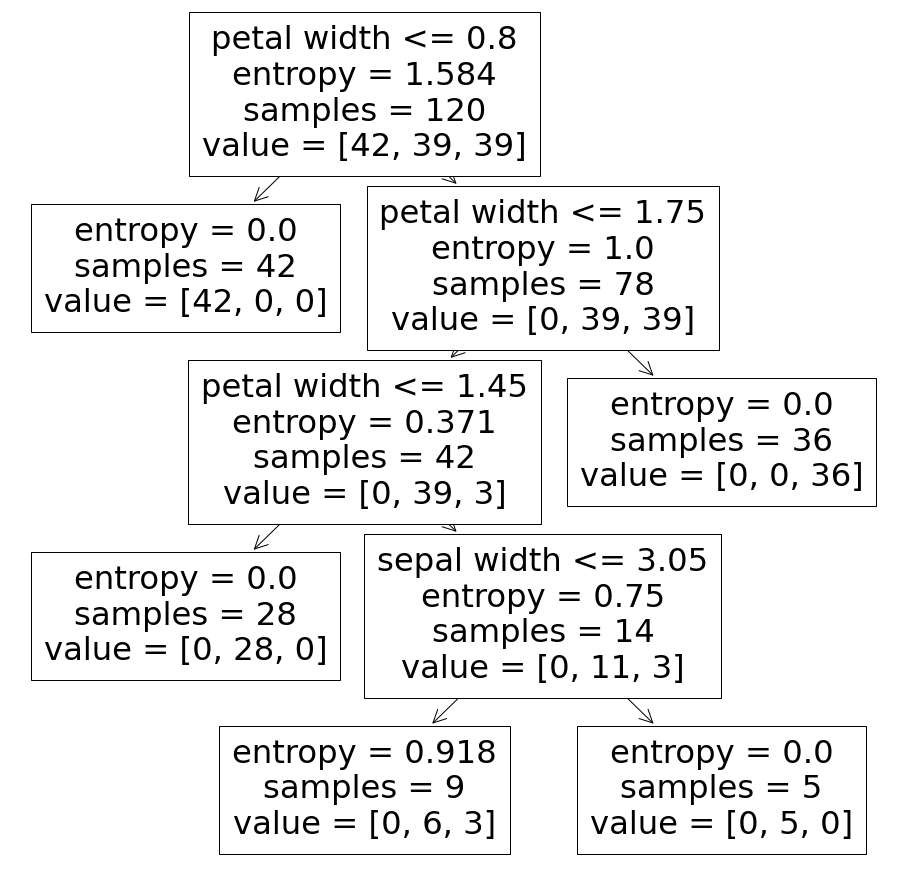

In [9]:
fig, ax = plt.subplots(figsize=(16, 16))
tree.plot_tree(clf,ax=ax,feature_names=['sepal length','sepal width','petal length','petal width'])
plt.show()

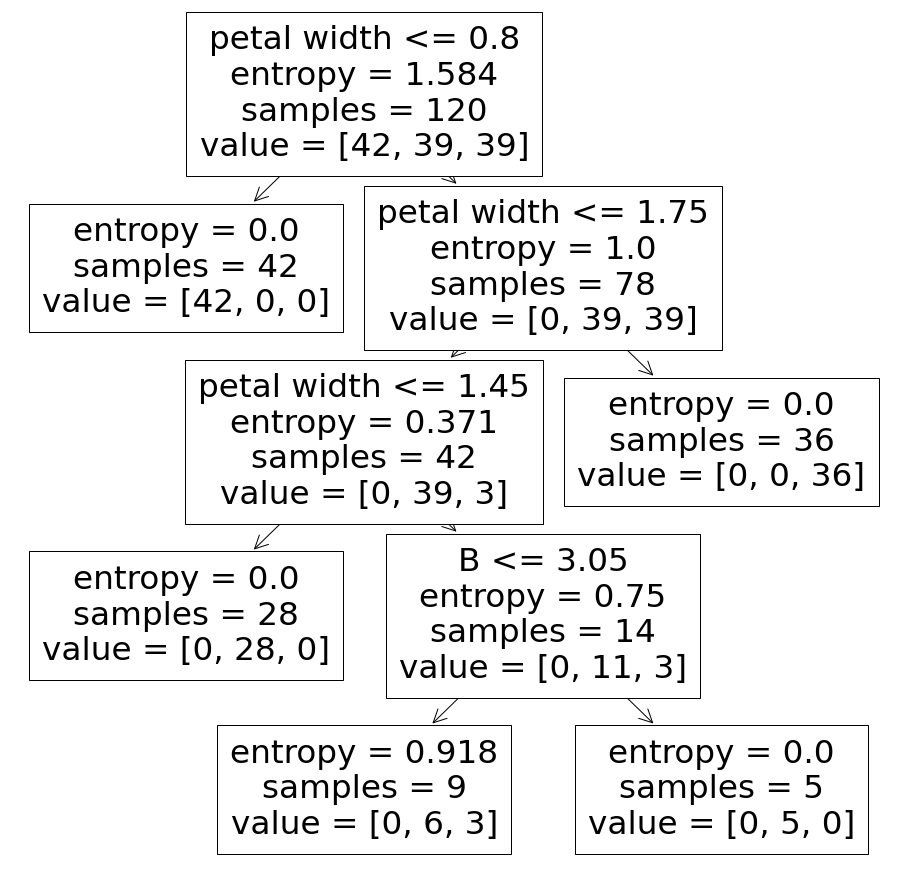

In [10]:
fig, ax = plt.subplots(figsize=(16, 16))
tree.plot_tree(clf,ax=ax,feature_names=['A','B','C','petal width'])
plt.show()

In [11]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [12]:
clf = LinearDiscriminantAnalysis()

In [13]:
clf.fit(X_train_1,Y_train_1)

LinearDiscriminantAnalysis()

In [14]:
clf.score(X_test_1, Y_test_1)

0.9333333333333333

In [15]:
from sklearn.metrics import confusion_matrix

In [16]:
y_true=Y_test_1
y_pred=clf.predict(X_test_1)

In [17]:
confusion_matrix(y_true, y_pred)

array([[ 8,  0,  0],
       [ 0, 10,  1],
       [ 0,  1, 10]])

Select best parameters of Decision Tree

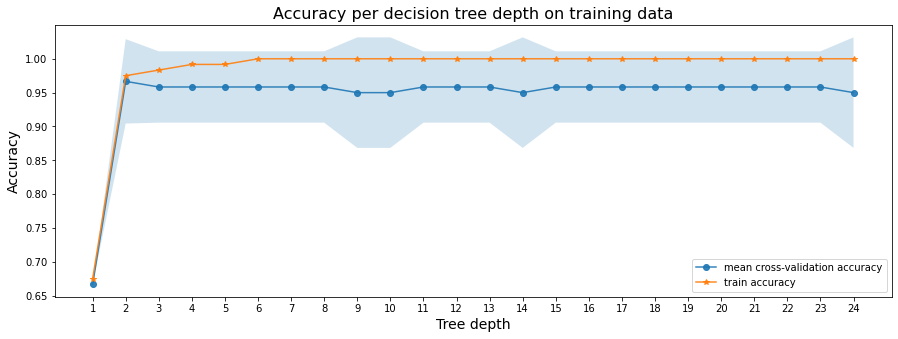

In [18]:


from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt

# function for fitting trees of various depths on the training data using cross-validation
def run_cross_validation_on_trees(X, y, tree_depths, cv=5, scoring='accuracy'):
    cv_scores_list = []
    cv_scores_std = []
    cv_scores_mean = []
    accuracy_scores = []
    for depth in tree_depths:
        tree_model = DecisionTreeClassifier(max_depth=depth)
        cv_scores = cross_val_score(tree_model, X, y, cv=cv, scoring=scoring)
        cv_scores_list.append(cv_scores)
        cv_scores_mean.append(cv_scores.mean())
        cv_scores_std.append(cv_scores.std())
        accuracy_scores.append(tree_model.fit(X, y).score(X, y))
    cv_scores_mean = np.array(cv_scores_mean)
    cv_scores_std = np.array(cv_scores_std)
    accuracy_scores = np.array(accuracy_scores)
    return cv_scores_mean, cv_scores_std, accuracy_scores
  
# function for plotting cross-validation results
def plot_cross_validation_on_trees(depths, cv_scores_mean, cv_scores_std, accuracy_scores, title):
    fig, ax = plt.subplots(1,1, figsize=(15,5))
    ax.plot(depths, cv_scores_mean, '-o', label='mean cross-validation accuracy', alpha=0.9)
    ax.fill_between(depths, cv_scores_mean-2*cv_scores_std, cv_scores_mean+2*cv_scores_std, alpha=0.2)
    ylim = plt.ylim()
    ax.plot(depths, accuracy_scores, '-*', label='train accuracy', alpha=0.9)
    ax.set_title(title, fontsize=16)
    ax.set_xlabel('Tree depth', fontsize=14)
    ax.set_ylabel('Accuracy', fontsize=14)
    ax.set_ylim(ylim)
    ax.set_xticks(depths)
    ax.legend()

# fitting trees of depth 1 to 24
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=5)
sm_tree_depths = range(1,25)
sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores = run_cross_validation_on_trees(X_train, y_train, sm_tree_depths)

# plotting accuracy
plot_cross_validation_on_trees(sm_tree_depths, sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores, 
                               'Accuracy per decision tree depth on training data')

In [19]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
rf=RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)
cv=10
scoring='accuracy'
cv_scores = cross_val_score(rf, X, y, cv=cv, scoring=scoring)
np.mean(cv_scores)
cv_scores_mean = []
accuracy_scores = []
tree_depths=np.arange(10)+1
for depth in tree_depths:
    rf=RandomForestClassifier(max_depth=depth, n_estimators=10, max_features=1)
    cv_scores = cross_val_score(rf, X, y, cv=cv, scoring=scoring)
    cv_scores_mean.append(cv_scores.mean())
    accuracy_scores.append(rf.fit(X, y).score(X, y))

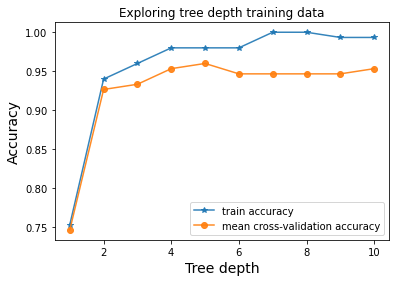

In [20]:
plt.plot(tree_depths, accuracy_scores, '-*', label='train accuracy', alpha=0.9)

plt.plot(tree_depths, cv_scores_mean, '-o', label='mean cross-validation accuracy', alpha=0.9)
plt.title('Exploring tree depth training data')
plt.xlabel('Tree depth', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.legend()

In [21]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
rf=RandomForestClassifier(max_depth=2, n_estimators=10, max_features=1)
cv=10
scoring='accuracy'
cv_scores = cross_val_score(rf, X, y, cv=cv, scoring=scoring)
np.mean(cv_scores)
cv_scores_mean = []
accuracy_scores = []
ensemble_size=np.arange(30)+1
for size in ensemble_size:
    rf=RandomForestClassifier(max_depth=2, n_estimators=size, max_features=1)
    cv_scores = cross_val_score(rf, X, y, cv=cv, scoring=scoring)
    cv_scores_mean.append(cv_scores.mean())
    accuracy_scores.append(rf.fit(X, y).score(X, y))

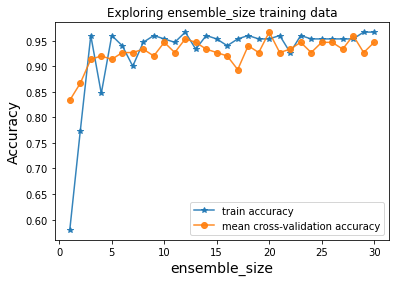

In [22]:
plt.plot(ensemble_size, accuracy_scores, '-*', label='train accuracy', alpha=0.9)

plt.plot(ensemble_size, cv_scores_mean, '-o', label='mean cross-validation accuracy', alpha=0.9)
plt.title('Exploring ensemble_size training data')
plt.xlabel('ensemble_size', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.legend()

In [23]:
ada=AdaBoostClassifier(n_estimators=100, random_state=0)
cv=10
scoring='accuracy'
cv_scores = cross_val_score(rf, X, y, cv=cv, scoring=scoring)
np.mean(cv_scores)
cv_scores_mean = []
accuracy_scores = []
ensemble_size=np.arange(30)+1
for size in ensemble_size:
    ada=AdaBoostClassifier(n_estimators=size, random_state=0)
    cv_scores = cross_val_score(ada, X, y, cv=cv, scoring=scoring)
    cv_scores_mean.append(cv_scores.mean())
    accuracy_scores.append(ada.fit(X, y).score(X, y))

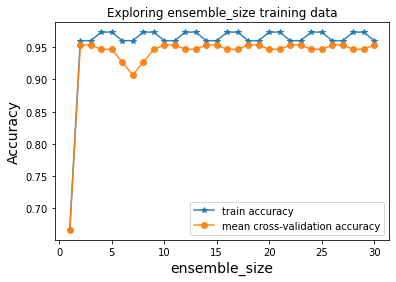

In [24]:
plt.plot(ensemble_size, accuracy_scores, '-*', label='train accuracy', alpha=0.9)

plt.plot(ensemble_size, cv_scores_mean, '-o', label='mean cross-validation accuracy', alpha=0.9)
plt.title('Exploring ensemble_size training data')
plt.xlabel('ensemble_size', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.legend()

In [25]:
from sklearn.ensemble import GradientBoostingClassifier

In [26]:
gbdt= GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0)
cv=10
scoring='accuracy'
cv_scores = cross_val_score(rf, X, y, cv=cv, scoring=scoring)
np.mean(cv_scores)
cv_scores_mean = []
accuracy_scores = []
tree_depths=np.arange(50)+1
for depth in tree_depths:
    gbdt= GradientBoostingClassifier(max_depth=depth, n_estimators=10, max_features=1)
    cv_scores = cross_val_score(gbdt, X, y, cv=cv, scoring=scoring)
    cv_scores_mean.append(cv_scores.mean())
    accuracy_scores.append(gbdt.fit(X, y).score(X, y))

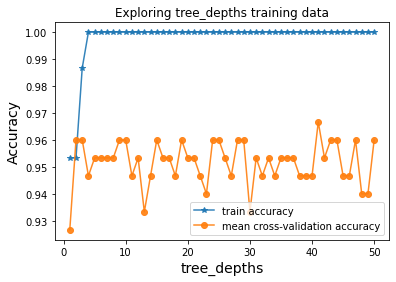

In [27]:
plt.plot(tree_depths, accuracy_scores, '-*', label='train accuracy', alpha=0.9)

plt.plot(tree_depths, cv_scores_mean, '-o', label='mean cross-validation accuracy', alpha=0.9)
plt.title('Exploring tree_depths training data')
plt.xlabel('tree_depths', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.legend()